The goal for this notebook will be two double-panel plots

1. A double-panel plot with percent error curves on the left, squared error curves on the right

2. A double-panel plot with median percent error histogram on the left, median squared error curves on the right

In [29]:
# First, load the emulator of choice
from cassL import train_emu as te
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [30]:
emu_name = "Hz1direct"

In [31]:
deltas = np.load("../../cassL/thesis_deltas/" + emu_name + ".npy")
percerr = np.load("../../cassL/thesis_percents/" + emu_name + ".npy")
colors = np.load("../../cassL/thesis_colors/" + emu_name + ".npy")

In [32]:
k_axis = np.load("../../cassL/data_sets/k/300k.npy")

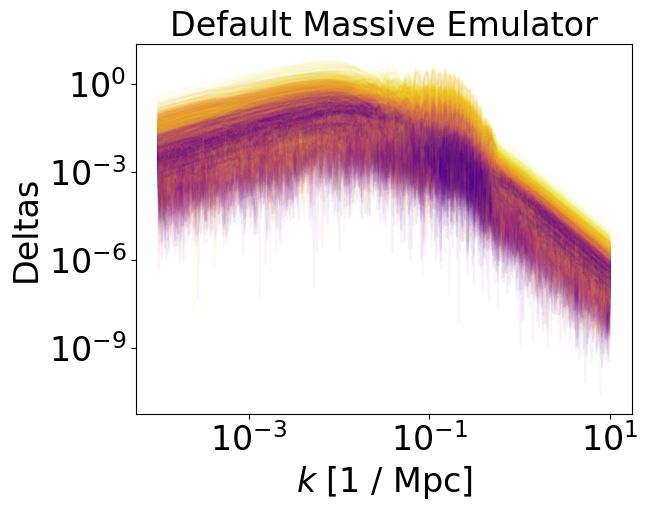

In [33]:
fig = plt.figure()
ax = fig.gca()

for i in range(len(deltas)):
    ax.loglog(k_axis, np.abs(deltas[i]), alpha=0.05, color=colors[i])    
    
ax.tick_params(labelsize=24)

ax.set_title("Default Massive Emulator", fontsize=24)
ax.set_xlabel("$k$ [1 / Mpc]", fontsize=24)
ax.set_ylabel("Deltas", fontsize=24)

#plt.savefig("nolog_noabs.png")

Text(0, 0.5, 'Percent Error')

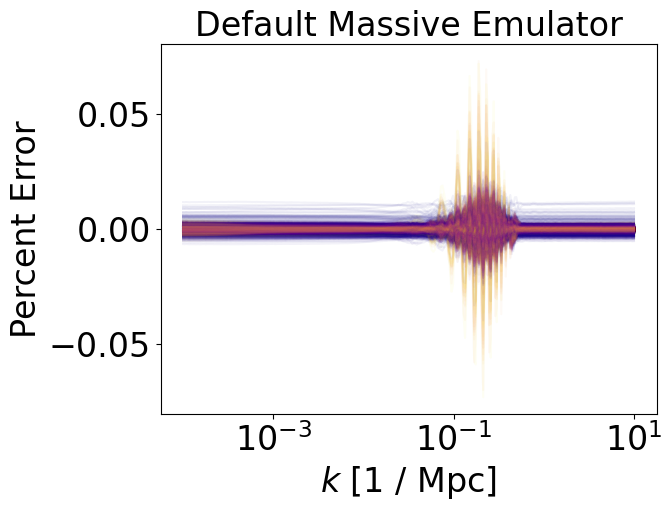

In [34]:
fig = plt.figure()
ax = fig.gca()

for i in range(len(percerr)):
    ax.plot(k_axis, percerr[i], alpha=0.05, color=colors[i])
ax.set_xscale('log')

ax.tick_params(labelsize=24)

ax.set_title("Default Massive Emulator", fontsize=24)
ax.set_xlabel("$k$ [1 / Mpc]", fontsize=24)
ax.set_ylabel("Percent Error", fontsize=24)

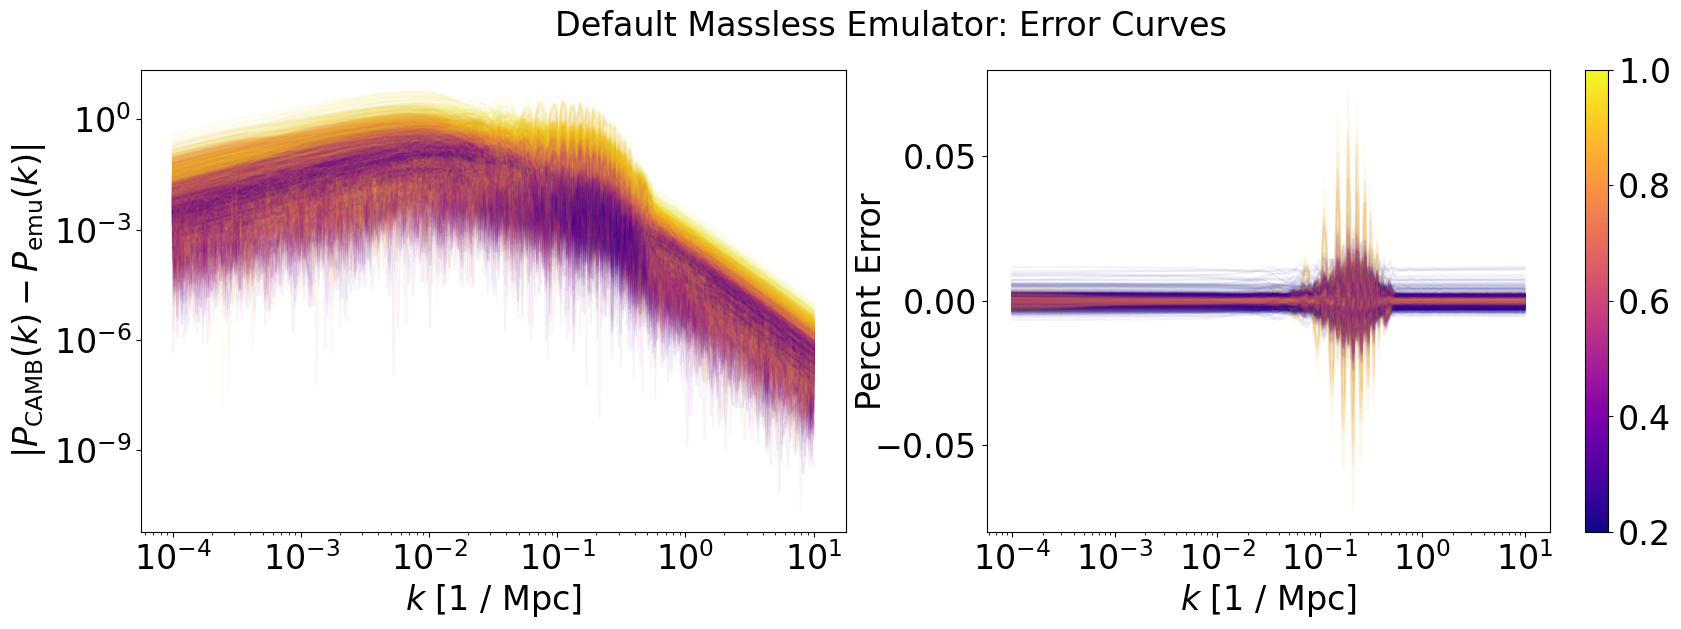

In [40]:
fig, axs = plt.subplots(1, 2, sharex="row", figsize=(20,6))

for i in range(len(percerr)):
    axs[0].loglog(k_axis, np.abs(deltas[i]), alpha=0.05, color=colors[i])
    axs[1].plot(k_axis, percerr[i], alpha=0.05, color=colors[i])

axs[0].tick_params(labelsize=24)    
    
#axs[0].set_title("Default Massive Emulator", fontsize=24)
axs[0].set_xlabel("$k$ [1 / Mpc]", fontsize=24)
axs[0].set_ylabel("|$P_\mathrm{CAMB}(k) - P_\mathrm{emu}(k)$|", fontsize=24)    
    
axs[1].set_xscale('log')

axs[1].tick_params(labelsize=24)

#axs[1].set_title("Default Massive Emulator", fontsize=24)
axs[1].set_xlabel("$k$ [1 / Mpc]", fontsize=24)
axs[1].set_ylabel("Percent Error", fontsize=24, labelpad=-10)

norm = mpl.colors.Normalize(vmin=0.2, vmax=1.0)
cbar = plt.colorbar(mpl.cm.ScalarMappable(cmap=plt.cm.plasma, norm=norm))
cbar.ax.tick_params(labelsize=24)

fig.suptitle("Default Massless Emulator: Error Curves", fontsize=24)
plt.savefig("def_massless_curves.png", bbox_inches="tight")

In [36]:
hist_deltas = np.median(np.abs(deltas), axis=1)
hist_percs = np.max(np.abs(percerr), axis=1)

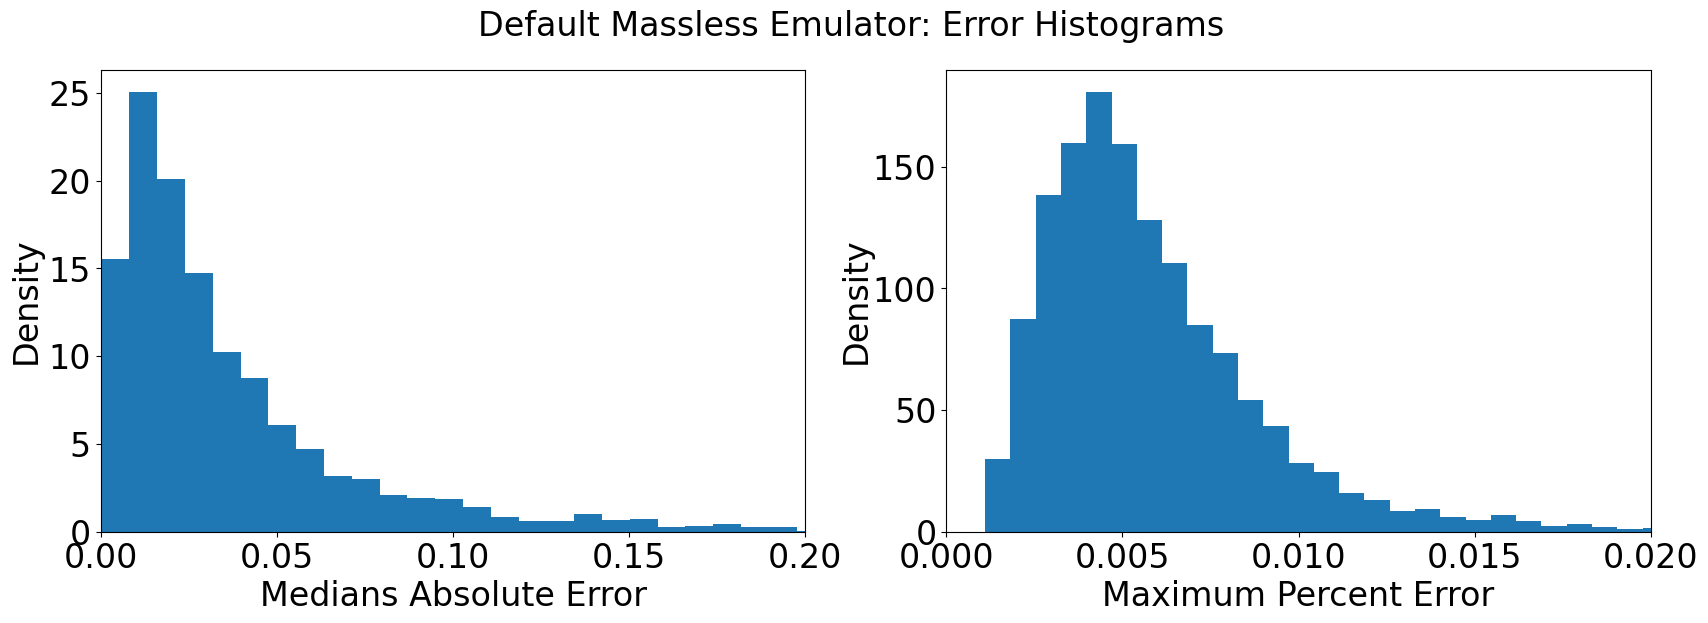

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(20,6))

axs[0].hist(hist_deltas, bins=100, density=True)
axs[1].hist(hist_percs, bins=100, density=True)

axs[0].tick_params(labelsize=24)    
axs[0].set_xlim((0, 0.2))

#axs[0].set_title("Default Massive Emulator", fontsize=24)
axs[0].set_xlabel("Medians Absolute Error", fontsize=24)
axs[0].set_ylabel("Density", fontsize=24)    

axs[1].tick_params(labelsize=24)
axs[1].set_xlim((0, 0.02))

#axs[1].set_title("Default Massive Emulator", fontsize=24)
axs[1].set_xlabel("Maximum Percent Error", fontsize=24)
axs[1].set_ylabel("Density", fontsize=24, labelpad=0)

fig.suptitle("Default Massless Emulator: Error Histograms", fontsize=24)
plt.savefig("def_massless_hist.png", bbox_inches="tight")